### Problem Statement

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

 

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.


#### What is Train and Test

In ML, train and test simply means a way to create and test a model.

* Creation of Model is done using training data and the reason why it is called train is because train set contains predictors as well as Target variable.

* Where as the test set has all the predictor variables however, the target is not given because in test set, we wish to predict the Target.

* The No of columns in train set are 'n' and in test set it is 'n-1'

In [1]:
# Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Data Visualization
import seaborn as sns # Data Visualization

In [3]:
# Importing the Dataset
train = pd.read_csv("./Downloads/train_kOBLwZA.csv")
test = pd.read_csv("./Downloads/test_t02dQwI.csv")

In [30]:
# Preview the Dataset
train.head(2) # firs 5 rows of the data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [7]:
test.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
5676,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1
5680,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1


In [8]:
# Shape of the Data
train.shape, test.shape

((8523, 12), (5681, 11))

In [9]:
train.columns # List of columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [10]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [11]:
# Info of Dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [14]:
# Count of Missing Values
train.isnull().sum()[train.isnull().sum()!=0]

Item_Weight    1463
Outlet_Size    2410
dtype: int64

In [15]:
test.isnull().sum()[test.isnull().sum()!=0]

Item_Weight     976
Outlet_Size    1606
dtype: int64

### Univariate Analysis - Numerical Columns

In [16]:
train.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138


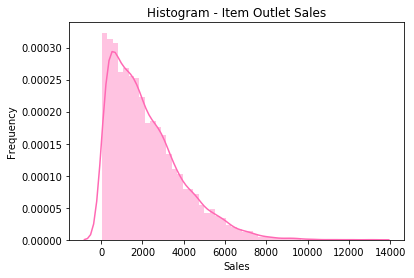

In [22]:
# Target Variable Item_Outlet_Sales
# Since it is Numerical, we will create a Histogram
sns.distplot(train["Item_Outlet_Sales"], color = "hotpink")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.title("Histogram - Item Outlet Sales")
plt.show()

##### Inference

1. Sales appears to be skewed which means that there is a presence of Outlier in the Data.

2. In Positively Skewed Data, Mean>Median>Mode and reverse for -vely skewed data.

In [18]:
train.Item_Outlet_Sales.mean()

2181.2889135750365

In [19]:
train.Item_Outlet_Sales.median()

1794.3310000000001

In [20]:
# Summary Statistics
train.Item_Outlet_Sales.describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

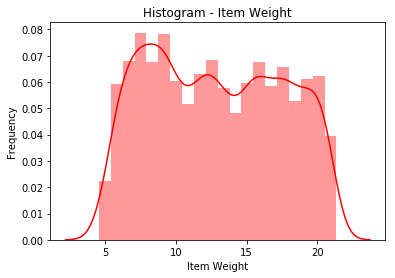

In [25]:
# Item Weight
sns.distplot(train["Item_Weight"].dropna(), color = "red")
plt.xlabel("Item Weight")
plt.ylabel("Frequency")
plt.title("Histogram - Item Weight")
plt.show()

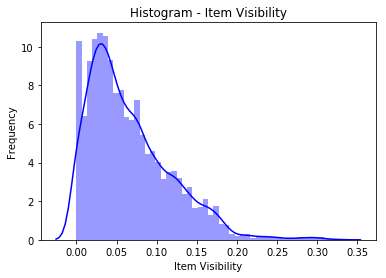

In [27]:
# Item Visibility
sns.distplot(train["Item_Visibility"], color = "blue")
plt.xlabel("Item Visibility")
plt.ylabel("Frequency")
plt.title("Histogram - Item Visibility")
plt.show()

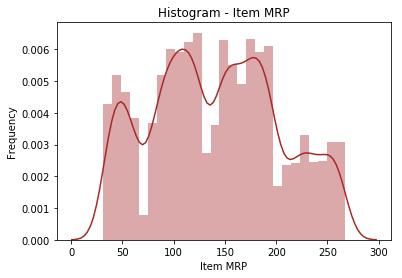

In [29]:
# Item MRP
sns.distplot(train["Item_MRP"], color = "brown")
plt.xlabel("Item MRP")
plt.ylabel("Frequency")
plt.title("Histogram - Item MRP")
plt.show()

In [36]:
train.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138


### Univariate Analysis - Categorical Columns

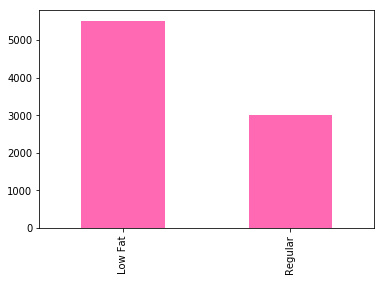

In [43]:
train.Item_Fat_Content.value_counts().plot(kind = "bar", color = "hotpink")

In [42]:
train.Item_Fat_Content.replace(to_replace=['reg'], 
                               value = ["Regular"], inplace = True)

In [44]:
test.Item_Fat_Content.replace(to_replace=['reg'], 
                               value = ["Regular"], inplace = True)

In [47]:
test.Item_Fat_Content.value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [46]:
test.Item_Fat_Content.replace(to_replace=['LF','low fat'], 
                               value = ["Low Fat"]*2, inplace = True)

In [50]:
# Combining the Dataset
combined = pd.concat([train,test], sort = False, ignore_index = True)

In [51]:
combined.isnull().sum()[combined.isnull().sum()!=0]

Item_Weight          2439
Outlet_Size          4016
Item_Outlet_Sales    5681
dtype: int64

In [52]:
combined.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138


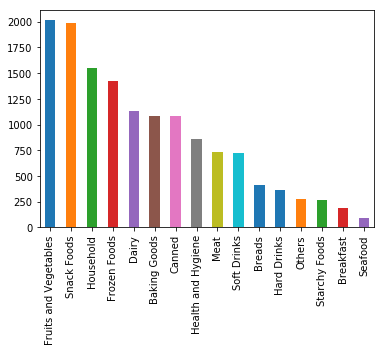

In [57]:
combined.Item_Type.value_counts().plot(kind = "bar")

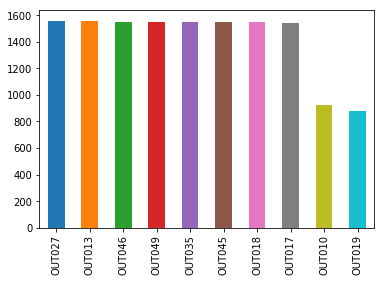

In [58]:
combined.Outlet_Identifier.value_counts().plot(kind = "bar")

In [61]:
combined.Outlet_Identifier.unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

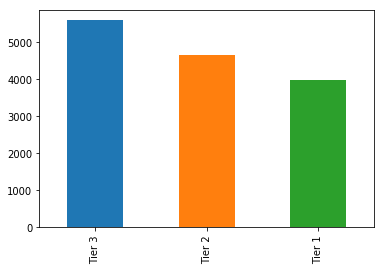

In [62]:
combined.Outlet_Location_Type.value_counts().plot(kind = "bar")

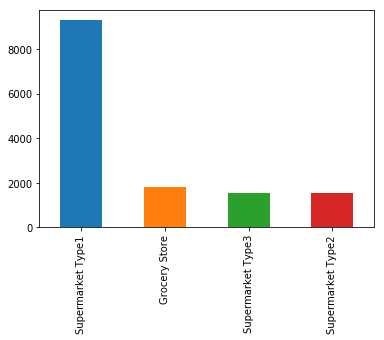

In [63]:
combined.Outlet_Type.value_counts().plot(kind = "bar")

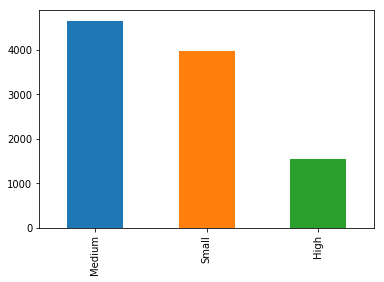

In [64]:
combined.Outlet_Size.value_counts().plot(kind = "bar")

#### Summary - Univariate Analysis

1. Sales is skewed becuase of presence of outliers.

2. Item Weight has lots of Missing Values and shows no pattern in histogram.

3. Item MRP shows 04 data distributions. Need to explore more.

4. There are two types of Products sold - Regular and Low Fat

5. Item Visibility has lots of 0 values - Need to Treat this and it is skewed which means that there are products which have higher visibility in comparison to others.

6. Outlet Size is mostly "Medium" wherein the Type of Outlets is "S1" and most of the cities where these stores are opened are "Tier 3" cities.

7. The Top 5 products that sell in these stores are Fruits and Veggies, Snack Foods, Dairy, Frozen Food followed by Household Items.



### Bivariate Analysis - Numerical vs Numerical

In [65]:
train.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138


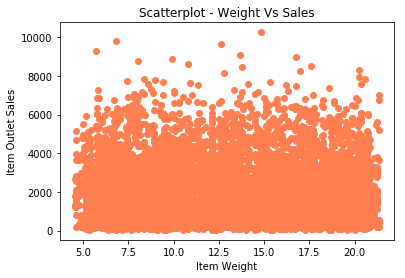

In [67]:
# Item Weight vs Sales
plt.scatter(combined.Item_Weight, 
            combined.Item_Outlet_Sales, color = "coral")
plt.xlabel("Item Weight")
plt.ylabel("Item Outlet Sales")
plt.title("Scatterplot - Weight Vs Sales")
plt.show()

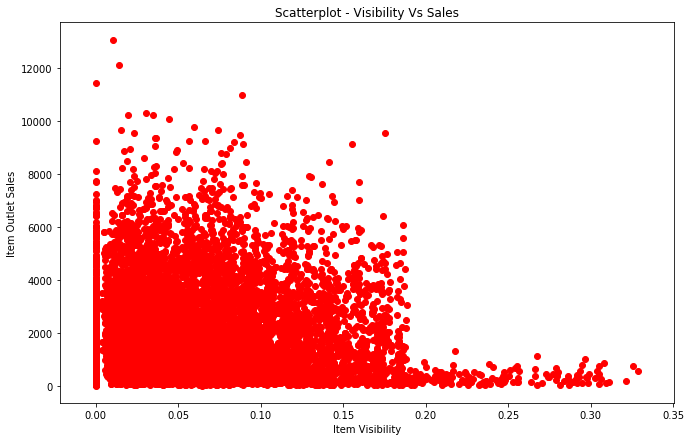

In [71]:
# Item Visibility vs Sales]
plt.figure(figsize = [11,7])
plt.scatter(combined.Item_Visibility, 
            combined.Item_Outlet_Sales, color = "red")
plt.xlabel("Item Visibility")
plt.ylabel("Item Outlet Sales")
plt.title("Scatterplot - Visibility Vs Sales")
plt.show()

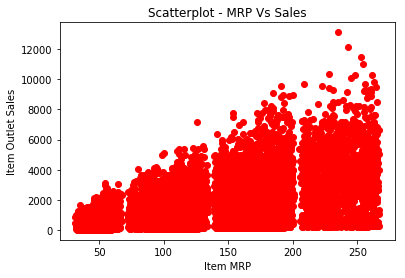

In [77]:
# Item MRP vs Sales
plt.figure(figsize = [6,4]) # Dimensions of the Plot
plt.scatter(combined.Item_MRP, 
            combined.Item_Outlet_Sales, color = "red")
plt.xlabel("Item MRP")
plt.ylabel("Item Outlet Sales")
plt.title("Scatterplot - MRP Vs Sales")
plt.show()

#### Bivariate - Categorical Vs Numerical

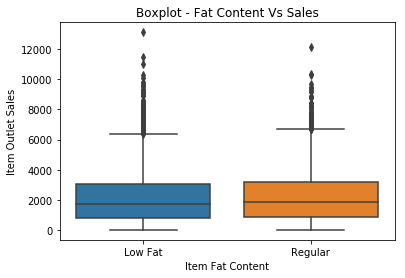

In [88]:
# Item Fat Content Vs Sales
sns.boxplot(x = "Item_Fat_Content",
           y = "Item_Outlet_Sales", data =  combined)
plt.xlabel("Item Fat Content")
plt.ylabel("Item Outlet Sales")
plt.title("Boxplot - Fat Content Vs Sales")
plt.show()

In [87]:
combined.groupby("Item_Fat_Content")["Item_Outlet_Sales"].describe().T

Item_Fat_Content,Low Fat,Regular
count,5517.000000,3006.000000
mean,2157.711534,2224.561170
std,1697.973824,1721.480865
min,33.290000,33.955800
25%,826.257800,857.550400
50%,1765.035800,1844.598900
75%,3050.695600,3198.669650
max,13086.964800,12117.560000


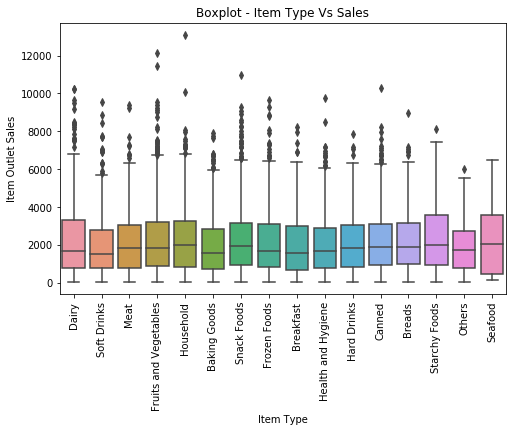

In [95]:
# Item Type Vs Sales
plt.figure(figsize = [8,5])
sns.boxplot(x = "Item_Type",
           y = "Item_Outlet_Sales", data =  combined)
plt.xticks(rotation = 90) # rotation of the x axis values
plt.xlabel("Item Type")
plt.ylabel("Item Outlet Sales")
plt.title("Boxplot - Item Type Vs Sales")
plt.show()

In [97]:
# Statistical Summary of all the Item Types
combined.groupby("Item_Type")["Item_Outlet_Sales"].describe().T

Item_Type,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
count,648.000000,251.000000,110.000000,649.000000,682.000000,856.000000,1232.000000,214.000000,520.000000,910.000000,425.000000,169.000000,64.000000,1200.000000,445.000000,148.000000
mean,1952.971207,2204.132226,2111.808651,2225.194904,2232.542597,2132.867744,2289.009592,2139.221622,2010.000265,2258.784300,2158.977911,1926.139702,2326.065928,2277.321739,2006.511735,2374.332773
std,1546.788045,1644.235914,1911.693586,1645.235638,1884.404698,1724.777720,1799.503459,1606.191587,1553.633063,1692.245757,1695.231081,1431.860471,1842.988719,1705.121755,1674.249752,1773.945328
min,37.284800,35.287400,39.948000,37.950600,40.613800,36.619000,45.274400,37.950600,34.621600,33.290000,47.937600,39.948000,149.805000,33.955800,33.290000,58.590400
25%,705.082200,968.739000,679.116000,952.094000,788.973000,808.947000,884.848200,834.913200,758.845550,853.389150,782.980800,790.970400,473.383800,918.804000,771.662200,958.752000
50%,1577.946000,1860.245200,1554.643000,1860.245200,1650.851100,1687.137200,1830.950000,1816.635300,1669.493500,1981.420800,1829.618400,1713.769200,2055.324600,1944.136000,1518.024000,1968.104800
75%,2823.824250,3145.905000,2970.300250,3101.296400,3296.209350,3079.491450,3227.132600,3071.335400,2884.578500,3236.786700,3036.048000,2719.793000,3589.327800,3143.574700,2759.075200,3592.656800
max,7931.675400,8958.339000,8209.314000,10306.584000,10256.649000,9678.068800,12117.560000,7843.124000,9779.936200,13086.964800,9390.443200,6008.845000,6503.534400,10993.689600,9554.230000,8132.081200


In [98]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

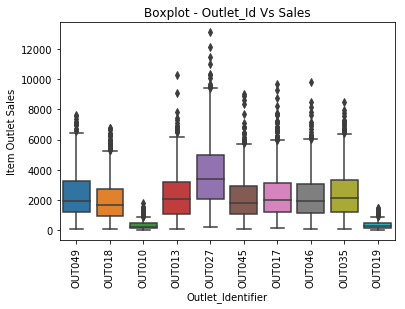

In [101]:
# Item Type Vs Sales
#plt.figure(figsize = [8,5])
sns.boxplot(x = "Outlet_Identifier",
           y = "Item_Outlet_Sales", data =  combined)
plt.xticks(rotation = 90) # rotation of the x axis values
plt.xlabel("Outlet_Identifier")
plt.ylabel("Item Outlet Sales")
plt.title("Boxplot - Outlet_Id Vs Sales")
plt.show()

In [102]:
combined.groupby("Outlet_Identifier")["Item_Outlet_Sales"].describe().T

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
count,555.000000,932.000000,926.000000,928.000000,528.000000,935.000000,930.000000,929.000000,930.000000,930.000000
mean,339.351662,2298.995256,2340.675263,1995.498739,340.329723,3694.038558,2438.841866,2192.384798,2277.844267,2348.354635
std,271.014855,1533.531664,1550.778025,1375.932889,249.979449,2127.760054,1538.512533,1462.399658,1488.405631,1513.289464
min,33.290000,73.238000,143.812800,69.243200,33.955800,241.685400,113.851800,99.870000,101.867400,111.854400
25%,154.132700,1072.603800,1195.943250,981.555650,153.633350,2044.338900,1238.887350,1068.609000,1137.186400,1182.793700
50%,250.340800,2050.664000,2005.056700,1655.178800,265.321300,3364.953200,2109.254400,1834.944800,1945.800500,1966.107400
75%,455.407200,3166.378350,3096.469350,2702.648650,460.733600,4975.523400,3310.357600,2929.520000,3095.637100,3281.728200
max,1775.688600,10256.649000,9664.752800,6768.522800,1482.070800,13086.964800,8479.628800,8994.958000,9779.936200,7646.047200


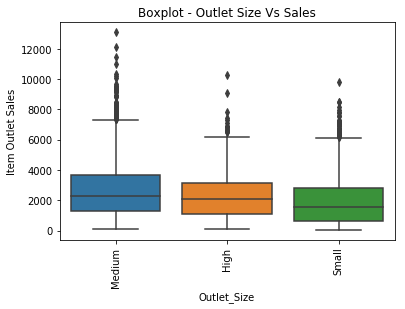

In [103]:
# Item Type Vs Sales
#plt.figure(figsize = [8,5])
sns.boxplot(x = "Outlet_Size",
           y = "Item_Outlet_Sales", data =  combined)
plt.xticks(rotation = 90) # rotation of the x axis values
plt.xlabel("Outlet_Size")
plt.ylabel("Item Outlet Sales")
plt.title("Boxplot - Outlet Size Vs Sales")
plt.show()

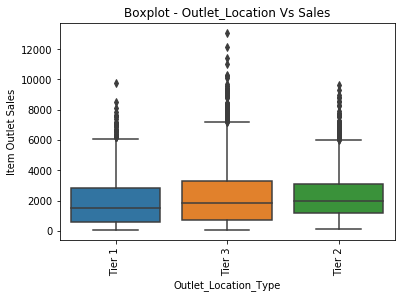

In [107]:
# Item Type Vs Sales
#plt.figure(figsize = [8,5])
sns.boxplot(x = "Outlet_Location_Type",
           y = "Item_Outlet_Sales", data =  combined)
plt.xticks(rotation = 90) # rotation of the x axis values
plt.xlabel("Outlet_Location_Type")
plt.ylabel("Item Outlet Sales")
plt.title("Boxplot - Outlet_Location Vs Sales")
plt.show()

In [111]:
pd.DataFrame(combined.groupby(['Outlet_Identifier', 
                               "Outlet_Location_Type",
                              "Outlet_Type"])
             ['Outlet_Size'].value_counts()).T

Outlet_Identifier,OUT013,OUT018,OUT019,OUT027,OUT035,OUT046,OUT049
Outlet_Location_Type,Tier 3,Tier 3,Tier 1,Tier 3,Tier 2,Tier 1,Tier 1
Outlet_Type,Supermarket Type1,Supermarket Type2,Grocery Store,Supermarket Type3,Supermarket Type1,Supermarket Type1,Supermarket Type1
Outlet_Size,High,Medium,Small,Medium,Small,Small,Medium
Outlet_Size,1553,1546,880,1559,1550,1550,1550


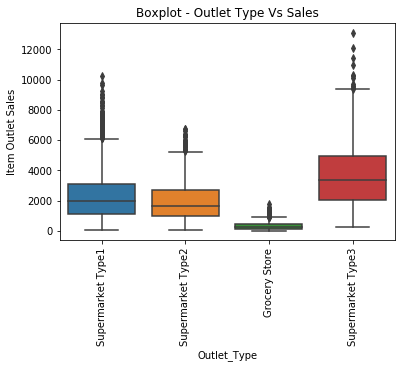

In [110]:
sns.boxplot(x = "Outlet_Type",
           y = "Item_Outlet_Sales", data =  combined)
plt.xticks(rotation = 90) # rotation of the x axis values
plt.xlabel("Outlet_Type")
plt.ylabel("Item Outlet Sales")
plt.title("Boxplot - Outlet Type Vs Sales")
plt.show()

#### Summary - Bivariate Analysis

1. Highest Performing Outlet is Outlet 27 mostly based in Tier 3 cities and are S3 Stores.

2. Higher the Visibility, Lesser the Sales for the Items in the Store. This is because high visibility shows that the products are large/heavy in nature and hence people are not interested in buying them on a day to day basis. However, the Groceries, Snacks, Fruits and Veggies are daily items, although low in visibility but high in sales.

3. No Pattern Seen in Item Weight Vs Sales.

4. Abnormality - A Straight Line in Visibility Plot is found at 0 meaning that the sales is happening where the product is not seen/visible. Need to rectify this.

5. Tier 3 Cities have better sales and S3 stores are making most of the money and of course, the size is Medium.


#### Missing Values and their Imputation

1. Mean/Median Imputation for Numerical Columns.

2. Mode is used to impute the values where the col is categorical.

3. Find out a Pattern - There must be some pattern amongst the columns. Hence, its wise to exploit the pattern and use it to your best.

4. Build a Machine Learning Model to fill the Missing Values.

In [112]:
combined.isnull().sum()[combined.isnull().sum()!=0]

Item_Weight          2439
Outlet_Size          4016
Item_Outlet_Sales    5681
dtype: int64

In [124]:
notna = combined.dropna()

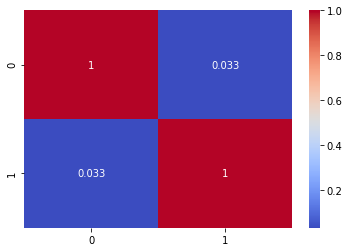

In [137]:
sns.heatmap(np.corrcoef(notna.Item_Weight, notna.Item_MRP), 
           annot = True, cmap= "coolwarm")

In [138]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [142]:
combined[combined.Item_Identifier=="DRC01"]["Item_Weight"]

1        5.92
2272     5.92
2927      NaN
5029     5.92
5077     5.92
5218     5.92
9453     5.92
10588    5.92
12787    5.92
Name: Item_Weight, dtype: float64